In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import warnings
warnings.filterwarnings('ignore')

On utilise keras pour faciliter les prototypes 

## Librairies 

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Données 

In [4]:
from transplant.data.learningset import Learningset

learningset = Learningset()

#X_train, X_test, y_train, y_test, X_col = learningset.get_data_merged_dynamic_flatten_full()
train, test = learningset.get_data_merged_dynamic_flatten_full(full_df=True)

In [5]:
choix_features=['PEEPtotal_std',
 'Temp_mean',
 'ETCO2_mean',
 'FiO2_std',
 'LAS',
 'Poids',
 'SpO2_mean',
 'BIS SR_std']

In [6]:
num_feat=len(choix_features)

In [7]:
X_train=train[choix_features].values 
X_test=test[choix_features].values
y_train=train['target'].values
y_test=test['target'].values

In [8]:
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241, 8), (101, 8), (241, 1), (101, 1))

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

## Modèle simple 

In [11]:
model = Sequential()
model.add(Dense(num_feat//2, activation='relu', input_dim=num_feat))
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=200,
          batch_size=200)
score = model.evaluate(X_test, y_test, batch_size=50)

Epoch 1/200
241/241 [==============================] - 0s 2ms/step - loss: 9.1626 - acc: 0.4315
Epoch 2/200
241/241 [==============================] - 0s 83us/step - loss: 9.1626 - acc: 0.4315
Epoch 3/200
241/241 [==============================] - 0s 79us/step - loss: 9.1626 - acc: 0.4315
Epoch 4/200
241/241 [==============================] - 0s 95us/step - loss: 9.1626 - acc: 0.4315
Epoch 5/200
241/241 [==============================] - 0s 62us/step - loss: 9.1626 - acc: 0.4315
Epoch 6/200
241/241 [==============================] - 0s 29us/step - loss: 9.1626 - acc: 0.4315
Epoch 7/200
241/241 [==============================] - 0s 50us/step - loss: 9.1626 - acc: 0.4315
Epoch 8/200
241/241 [==============================] - 0s 46us/step - loss: 9.1626 - acc: 0.4315
Epoch 9/200
241/241 [==============================] - 0s 54us/step - loss: 9.1626 - acc: 0.4315
Epoch 10/200
241/241 [==============================] - 0s 37us/step - loss: 9.1626 - acc: 0.4315
Epoch 11/200
241/241 [========

241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 85/200
241/241 [==============================] - 0s 29us/step - loss: 9.1626 - acc: 0.4315
Epoch 86/200
241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 87/200
241/241 [==============================] - 0s 29us/step - loss: 9.1626 - acc: 0.4315
Epoch 88/200
241/241 [==============================] - 0s 75us/step - loss: 9.1626 - acc: 0.4315
Epoch 89/200
241/241 [==============================] - 0s 50us/step - loss: 9.1626 - acc: 0.4315
Epoch 90/200
241/241 [==============================] - 0s 29us/step - loss: 9.1626 - acc: 0.4315
Epoch 91/200
241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 92/200
241/241 [==============================] - 0s 29us/step - loss: 9.1626 - acc: 0.4315
Epoch 93/200
241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 94/200
241/241 [===========

241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 168/200
241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 169/200
241/241 [==============================] - 0s 41us/step - loss: 9.1626 - acc: 0.4315
Epoch 170/200
241/241 [==============================] - 0s 37us/step - loss: 9.1626 - acc: 0.4315
Epoch 171/200
241/241 [==============================] - 0s 37us/step - loss: 9.1626 - acc: 0.4315
Epoch 172/200
241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 173/200
241/241 [==============================] - 0s 79us/step - loss: 9.1626 - acc: 0.4315
Epoch 174/200
241/241 [==============================] - 0s 41us/step - loss: 9.1626 - acc: 0.4315
Epoch 175/200
241/241 [==============================] - 0s 33us/step - loss: 9.1626 - acc: 0.4315
Epoch 176/200
241/241 [==============================] - 0s 37us/step - loss: 9.1626 - acc: 0.4315
Epoch 177/200
241/241 [=

In [12]:
score 

[9.415521245191593, 0.41584158061754584]

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [14]:
y_test_pred_cls=np.array(list(map(np.argmax,model.predict(X_test))))
y_test_cls=np.array(list(map(np.argmax,y_test)))

In [15]:
conf_matrix=confusion_matrix(y_test_cls,y_test_pred_cls)

In [16]:
conf_matrix

array([[ 0, 59],
       [ 0, 42]], dtype=int64)

In [17]:
print(metrics.classification_report(y_test_cls,y_test_pred_cls))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.42      1.00      0.59        42

   micro avg       0.42      0.42      0.42       101
   macro avg       0.21      0.50      0.29       101
weighted avg       0.17      0.42      0.24       101



C:\Users\Delanoue\Anaconda3\envs\env_py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Delanoue\Anaconda3\envs\env_py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Delanoue\Anaconda3\envs\env_py36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


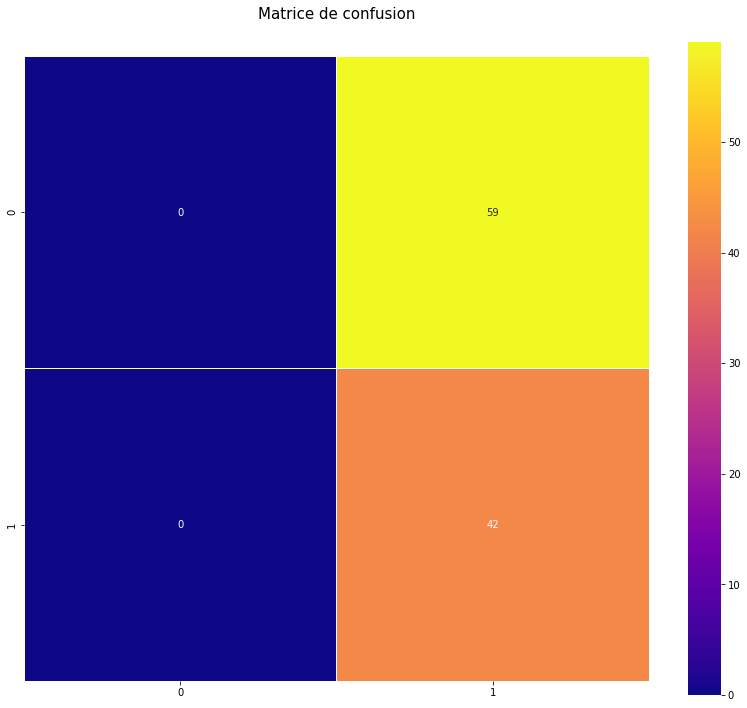

In [18]:
colormap = plt.cm.plasma
plt.figure(figsize=(14,12))
plt.title('Matrice de confusion', y=1.05, size=15)
sns.heatmap(conf_matrix,linewidths=0.1, 
            square=True, cmap=colormap, linecolor='white', annot=True)